# TASK 1

Average cost per step: 892.00


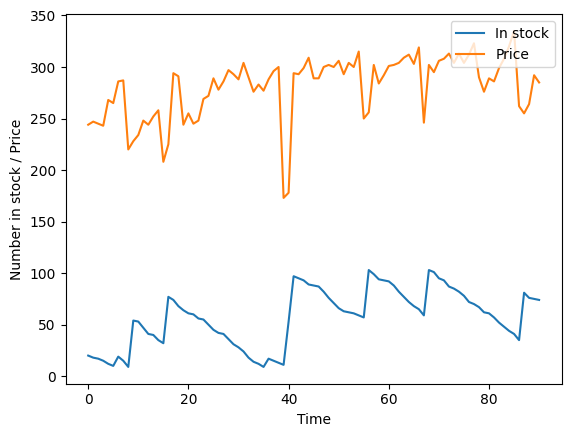

In [1]:
import random
import matplotlib.pyplot as plt

# Utility functions
def argmaxe(gen):
    maxv = -float('inf')
    maxvals = []
    for (e, v) in gen:
        if v > maxv:
            maxvals, maxv = [e], v
        elif v == maxv:
            maxvals.append(e)
    return random.choice(maxvals)

def flip(prob):
    return random.random() < prob

def dict_union(d1, d2):
    d = dict(d1)
    d.update(d2)
    return d

# Environment class
class TP_env:
    prices = [234, 234, 234, 234, 255, 255, 275, 275, 211, 211, 211,
              234, 234, 234, 234, 199, 199, 275, 275, 234, 234, 234, 234, 255,
              255, 260, 260, 265, 265, 265, 265, 270, 270, 255, 255, 260, 260,
              265, 265, 150, 150, 265, 265, 270, 270, 255, 255, 260, 260, 265,
              265, 265, 265, 270, 270, 211, 211, 255, 255, 260, 260, 265, 265,
              260, 265, 270, 270, 205, 255, 255, 260, 260, 265, 265, 265, 265,
              270, 270]
    max_price_addon = 20

    def __init__(self):
        self.time = 0
        self.stock = 20
        self.stock_history = []
        self.price_history = []

    def initial_percepts(self):
        self.stock_history.append(self.stock)
        price = self.prices[0] + random.randrange(self.max_price_addon)
        self.price_history.append(price)
        return {'price': price, 'instock': self.stock}

    def do(self, action):
        used = random.choice([6, 5, 4, 3, 2, 1])  # Simplified random usage
        bought = action['buy']
        self.stock = self.stock + bought - used
        self.stock_history.append(self.stock)
        self.time += 1
        price = (self.prices[self.time % len(self.prices)] +
                 random.randrange(self.max_price_addon) + self.time // 2)
        self.price_history.append(price)
        return {'price': price, 'instock': self.stock}

# Agent class
class TP_agent:
    def __init__(self, env):
        self.env = env
        self.spent = 0
        percepts = env.initial_percepts()
        self.ave = self.last_price = percepts['price']
        self.instock = percepts['instock']

    def go(self, n):
        for _ in range(n):
            if self.last_price < 0.9 * self.ave and self.instock < 60:
                tobuy = 48
            elif self.instock < 12:
                tobuy = 12
            else:
                tobuy = 0
            self.spent += tobuy * self.last_price
            percepts = self.env.do({'buy': tobuy})
            self.last_price = percepts['price']
            self.ave = self.ave + (self.last_price - self.ave) * 0.05
            self.instock = percepts['instock']

# Plotting class
class Plot_prices:
    def __init__(self, ag, env):
        self.ag = ag
        self.env = env
        plt.ion()
        plt.xlabel("Time")
        plt.ylabel("Number in stock / Price")

    def plot_run(self):
        num = len(self.env.stock_history)
        plt.plot(range(num), self.env.stock_history, label="In stock")
        plt.plot(range(num), self.env.price_history, label="Price")
        plt.legend(loc="upper right")
        plt.draw()
        plt.pause(1)  # Pause to show plot

# Run the simulation
env = TP_env()
ag = TP_agent(env)
ag.go(90)
print(f"Average cost per step: {ag.spent / env.time:.2f}")
pl = Plot_prices(ag, env)
pl.plot_run()
plt.show()  # Keep plot open

#  TASK 2

In [2]:
def vacuum_world_extended():
    # Goal state: all locations clean (0 = clean, 1 = dirty)
    goal_state = {'A': '0', 'B': '0', 'C': '0'}
    cost = 0
    cleaned_locations = set()  

    # Get initial inputs
    location_input = input("Enter Location of Vacuum (A, B, or C): ")
    status_A = input("Enter status of A (0=clean, 1=dirty): ")
    status_B = input("Enter status of B (0=clean, 1=dirty): ")
    status_C = input("Enter status of C (0=clean, 1=dirty): ")
    
    # Set initial states
    goal_state['A'] = status_A
    goal_state['B'] = status_B
    goal_state['C'] = status_C
    
    print("Initial State: " + str(goal_state))

    # Start cleaning process
    current_location = location_input
    
    while '1' in goal_state.values():  # While any room is dirty
        print(f"\nVacuum is at Location {current_location}")
        
        # Check and clean current location
        if goal_state[current_location] == '1' and current_location not in cleaned_locations:
            print(f"Location {current_location} is Dirty.")
            goal_state[current_location] = '0'
            cost += 1  # Cost for cleaning
            cleaned_locations.add(current_location)
            print(f"Cleaned {current_location}. Cost: {cost}")
        else:
            print(f"Location {current_location} is already clean or was cleaned.")

        # Move to next dirty location
        if goal_state['A'] == '1' and 'A' not in cleaned_locations:
            current_location = 'A'
            cost += 1  # Cost for moving
            print(f"Moving to A. Cost: {cost}")
        elif goal_state['B'] == '1' and 'B' not in cleaned_locations:
            current_location = 'B'
            cost += 1  # Cost for moving
            print(f"Moving to B. Cost: {cost}")
        elif goal_state['C'] == '1' and 'C' not in cleaned_locations:
            current_location = 'C'
            cost += 1  # Cost for moving
            print(f"Moving to C. Cost: {cost}")

    # Done cleaning
    print("\nFinal State: " + str(goal_state))
    print("Total Cost: " + str(cost))

vacuum_world_extended()

Enter Location of Vacuum (A, B, or C):  A
Enter status of A (0=clean, 1=dirty):  0
Enter status of B (0=clean, 1=dirty):  1
Enter status of C (0=clean, 1=dirty):  0


Initial State: {'A': '0', 'B': '1', 'C': '0'}

Vacuum is at Location A
Location A is already clean or was cleaned.
Moving to B. Cost: 1

Vacuum is at Location B
Location B is Dirty.
Cleaned B. Cost: 2

Final State: {'A': '0', 'B': '0', 'C': '0'}
Total Cost: 2


# TASK 3

In [4]:
def spam_filter():
    # Spam keywords
    spam_words = ["free money", "win now", "claim prize"]
    known_senders = ["friend@example.com", "family@example.com"]  # Example known senders
    
    # Get email details
    sender = input("Enter sender email: ")
    content = input("Enter email content: ").lower()
    
    # Rule 1: If from known sender, not spam
    if sender in known_senders:
        print("Not Spam - From known sender")
        return
    
    # Rule 2: Check for spam words
    for word in spam_words:
        if word in content:
            print("Spam - Contains suspicious words")
            return
    
    # If no rules match
    print("Not Spam")

spam_filter()

Enter sender email:  friend@example.com
Enter email content:  how are you


Not Spam - From known sender


# TASK 4

In [5]:
def smart_shopping_assistant():
    # Sample laptops: (name, price, quality (1-10), reviews (1-10))
    laptops = [
        ("Laptop A", 500, 7, 8),
        ("Laptop B", 700, 8, 7),
        ("Laptop C", 1000, 9, 9),
        ("Laptop D", 400, 6, 6)
    ]
    
    # Get user budget
    budget = float(input("Enter your budget: "))
    
    # Utility function: simple weighted score (quality + reviews - price factor)
    best_laptop = None
    best_score = -1
    
    for name, price, quality, reviews in laptops:
        if price <= budget:  # Only consider affordable laptops
            # Simple utility: higher quality and reviews are better, lower price is better
            score = quality + reviews - (price / 200)  # Price divided to balance scale
            if score > best_score:
                best_score = score
                best_laptop = (name, price, quality, reviews)
    
    if best_laptop:
        print(f"Best choice: {best_laptop[0]}")
        print(f"Price: ${best_laptop[1]}, Quality: {best_laptop[2]}, Reviews: {best_laptop[3]}")
    else:
        print("No laptops found within your budget.")

smart_shopping_assistant()

Enter your budget:  600


Best choice: Laptop A
Price: $500, Quality: 7, Reviews: 8
